In [10]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Ouvre le fichier EdStatsData.csv dans le même dossier que le notebook
data = pd.read_csv("Desktop/projet 2/EdStatsData.csv") 

# Affiche les 5 premières lignes du dataframe
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Supprimer toutes les valeurs duplicates 
data_no_duplicates = data.drop_duplicates()

In [13]:
# Supprimer toutes les lignes où le "Country Name" n'est pas un pays (ex: World, East Asia & Pacific, etc.)
data = data[data['Country Name'].isin(["World","Upper middle income","Sub-Saharan Africa (excluding high income)","Sub-Saharan Africa","South Asia","OECD members","North America","Middle income","Middle East & North Africa (excluding high income)","Middle East & North Africa","Lower middle income","Low & middle income","Low income","Least developed countries: UN classification","Latin America & Caribbean (excluding high income)","Arab World","Latin America & Caribbean","East Asia & Pacific","High income","Europe & Central Asia (excluding high income)","Heavily indebted poor countries (HIPC)","European Union","East Asia & Pacific (excluding high income)", "Euro area", "Europe & Central Asia"]) == False]

In [14]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Garde uniquement les lignes où "Indicator Name" est "GDP per capita, PPP (current international $)"
data_GDP = data[data['Indicator Name'] == 'GDP per capita, PPP (current international $)']

# Affiche les 5 premières lignes du dataframe
data_GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96537,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100202,Algeria,DZA,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103867,American Samoa,ASM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107532,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_GDP.loc[:, "Moyenne"] = data_GDP[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_GDP_rank = data_GDP[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_GDP_rank = data_GDP_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_GDP_rank = data_GDP_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_GDP_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/2807465524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GDP.loc[:, "Moyenne"] = data_GDP[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566


In [17]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_GDP_rank.loc[:, "Points"] = data_GDP_rank.index.max() - data_GDP_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_GDP_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212


In [18]:
# Garde uniquement les lignes où "Indicator Name" est "GNI, PPP (current international $)"
data_GNI = data[data['Indicator Name'] == 'GNI, PPP (current international $)']

# Affiche les 5 premières lignes du dataframe
data_GNI.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92878,Afghanistan,AFG,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96543,Albania,ALB,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100208,Algeria,DZA,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103873,American Samoa,ASM,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107538,Andorra,AND,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_GNI.loc[:, "Moyenne"] = data_GNI[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_GNI_rank = data_GNI[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_GNI_rank = data_GNI_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_GNI_rank = data_GNI_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_GNI_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/2062382578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GNI.loc[:, "Moyenne"] = data_GNI[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,China,"GNI, PPP (current international $)",1.828998e+13
1,United States,"GNI, PPP (current international $)",1.782235e+13
2,India,"GNI, PPP (current international $)",7.315381e+12
3,Japan,"GNI, PPP (current international $)",5.200886e+12
4,Germany,"GNI, PPP (current international $)",3.866104e+12


In [20]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_GNI_rank.loc[:, "Points"] = data_GNI_rank.index.max() - data_GNI_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_GNI_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,China,"GNI, PPP (current international $)",1.828998e+13,216
1,United States,"GNI, PPP (current international $)",1.782235e+13,215
2,India,"GNI, PPP (current international $)",7.315381e+12,214
3,Japan,"GNI, PPP (current international $)",5.200886e+12,213
4,Germany,"GNI, PPP (current international $)",3.866104e+12,212


In [21]:
# Garde uniquement les lignes où "Indicator Name" est "INTERNET USERS per 100 people"
data_internet = data[data['Indicator Name'] == 'Internet users (per 100 people)']

# Affiche les 5 premières lignes du dataframe
data_internet.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100330,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103995,American Samoa,ASM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_internet.loc[:, "Moyenne"] = data_internet[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_internet_rank = data_internet[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_internet_rank = data_internet_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_internet_rank = data_internet_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_internet_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/2323368807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_internet.loc[:, "Moyenne"] = data_internet[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,Iceland,Internet users (per 100 people),97.471323
1,Norway,Internet users (per 100 people),96.022376
2,Bermuda,Internet users (per 100 people),95.944583
3,Denmark,Internet users (per 100 people),95.235599
4,Luxembourg,Internet users (per 100 people),95.044891


In [23]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_internet_rank.loc[:, "Points"] = data_internet_rank.index.max() - data_internet_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_internet_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,Iceland,Internet users (per 100 people),97.471323,216
1,Norway,Internet users (per 100 people),96.022376,215
2,Bermuda,Internet users (per 100 people),95.944583,214
3,Denmark,Internet users (per 100 people),95.235599,213
4,Luxembourg,Internet users (per 100 people),95.044891,212


In [24]:
# Garde uniquement les lignes où "Indicator Name" est "Literacy rate, population 25-64 years, both sexes (%)"
data_Literacy_rate = data[data['Indicator Name'] == 'Literacy rate, population 25-64 years, both sexes (%)']

# Affiche les 5 premières lignes du dataframe
data_Literacy_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93012,Afghanistan,AFG,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96677,Albania,ALB,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100342,Algeria,DZA,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104007,American Samoa,ASM,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107672,Andorra,AND,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_Literacy_rate.loc[:, "Moyenne"] = data_Literacy_rate[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_Literacy_rate_rank = data_Literacy_rate[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_Literacy_rate_rank = data_Literacy_rate_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_Literacy_rate_rank = data_Literacy_rate_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_Literacy_rate_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/2732854717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Literacy_rate.loc[:, "Moyenne"] = data_Literacy_rate[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,Andorra,"Literacy rate, population 25-64 years, both se...",100.000000
1,Uzbekistan,"Literacy rate, population 25-64 years, both se...",100.000000
2,Greenland,"Literacy rate, population 25-64 years, both se...",100.000000
3,Ukraine,"Literacy rate, population 25-64 years, both se...",99.980960
4,Azerbaijan,"Literacy rate, population 25-64 years, both se...",99.898934


In [26]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_Literacy_rate_rank.loc[:, "Points"] = data_Literacy_rate_rank.index.max() - data_Literacy_rate_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_Literacy_rate_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,Andorra,"Literacy rate, population 25-64 years, both se...",100.000000,216
1,Uzbekistan,"Literacy rate, population 25-64 years, both se...",100.000000,215
2,Greenland,"Literacy rate, population 25-64 years, both se...",100.000000,214
3,Ukraine,"Literacy rate, population 25-64 years, both se...",99.980960,213
4,Azerbaijan,"Literacy rate, population 25-64 years, both se...",99.898934,212


In [27]:
# Garde uniquement les lignes où "Indicator Name" est "GDP per capita, PPP (current international $)"
data_Gov_Edu= data[data['Indicator Name'] == 'Government expenditure in educational institutions as % of GDP (%)']

# Affiche les 5 premières lignes du dataframe
data_Gov_Edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92879,Afghanistan,AFG,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96544,Albania,ALB,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100209,Algeria,DZA,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103874,American Samoa,ASM,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107539,Andorra,AND,Government expenditure in educational institut...,UIS.XGDP.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_Gov_Edu.loc[:, "Moyenne"] = data_Gov_Edu[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_Gov_Edu_rank = data_Gov_Edu[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_Gov_Edu_rank = data_Gov_Edu_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_Gov_Edu_rank = data_Gov_Edu_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_Gov_Edu_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/1044518857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Gov_Edu.loc[:, "Moyenne"] = data_Gov_Edu[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,Moldova,Government expenditure in educational institut...,7.609667
1,Kyrgyz Republic,Government expenditure in educational institut...,7.049865
2,Sweden,Government expenditure in educational institut...,6.965215
3,Costa Rica,Government expenditure in educational institut...,6.931557
4,Ghana,Government expenditure in educational institut...,6.853965


In [29]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_Gov_Edu_rank.loc[:, "Points"] = data_Gov_Edu_rank.index.max() - data_Gov_Edu_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_Gov_Edu_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,Moldova,Government expenditure in educational institut...,7.609667,216
1,Kyrgyz Republic,Government expenditure in educational institut...,7.049865,215
2,Sweden,Government expenditure in educational institut...,6.965215,214
3,Costa Rica,Government expenditure in educational institut...,6.931557,213
4,Ghana,Government expenditure in educational institut...,6.853965,212


In [30]:
# Garde uniquement les lignes où "Indicator Name" est "GDP per capita, PPP (current international $)"
data_Pop_Growth= data[data['Indicator Name'] == 'Population growth (annual %)']

# Affiche les 5 premières lignes du dataframe
data_Pop_Growth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.472266,2.587996,2.628657,2.576017,2.412657,2.157653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97597,Albania,ALB,Population growth (annual %),SP.POP.GROW,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101262,Algeria,DZA,Population growth (annual %),SP.POP.GROW,2.827186,2.779393,2.749168,2.741122,2.762508,2.803819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104927,American Samoa,ASM,Population growth (annual %),SP.POP.GROW,2.515623,2.260638,2.042334,1.815513,1.620493,1.494474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108592,Andorra,AND,Population growth (annual %),SP.POP.GROW,5.147543,5.150130,5.083934,4.862724,4.461191,3.935751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Calcule la moyenne des valeurs de 2012 à 2017 pour chaque ligne
data_Pop_Growth.loc[:, "Moyenne"] = data_Pop_Growth[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)

# Garde uniquement les colonnes "Country Name", "Indicator Name" et "Moyenne"
data_Pop_Growth_rank = data_Pop_Growth[["Country Name", "Indicator Name", "Moyenne"]]

# Trie les lignes par ordre décroissant de la colonne "Moyenne"
data_Pop_Growth_rank = data_Pop_Growth_rank.sort_values(by="Moyenne", ascending=False)

# Réinitialise les index des lignes
data_Pop_Growth_rank = data_Pop_Growth_rank.reset_index(drop=True)

# Affiche les 5 premières lignes du dataframe
data_Pop_Growth_rank.head()

/var/folders/d3/hd3bcgf11w793twdx6gfyh000000gn/T/ipykernel_2695/152295718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Pop_Growth.loc[:, "Moyenne"] = data_Pop_Growth[["2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)


,Country Name,Indicator Name,Moyenne
0,Oman,Population growth (annual %),6.249735
1,Qatar,Population growth (annual %),5.498950
2,Lebanon,Population growth (annual %),5.386916
3,Kuwait,Population growth (annual %),4.780087
4,Jordan,Population growth (annual %),4.435654


In [32]:
# Ajoute une colonne "Points" qui contient le nombre de points de chaque pays
data_Pop_Growth_rank.loc[:, "Points"] = data_Pop_Growth_rank.index.max() - data_Pop_Growth_rank.index.values

# Affiche les 5 premières lignes du dataframe
data_Pop_Growth_rank.head()

,Country Name,Indicator Name,Moyenne,Points
0,Oman,Population growth (annual %),6.249735,216
1,Qatar,Population growth (annual %),5.498950,215
2,Lebanon,Population growth (annual %),5.386916,214
3,Kuwait,Population growth (annual %),4.780087,213
4,Jordan,Population growth (annual %),4.435654,212


In [33]:
# Pour chaque pays on additionne les points obtenus dans chaque classement
data_final = data_GDP_rank[["Country Name", "Points"]]
data_final

,Country Name,Points
0,Qatar,216
1,"Macao SAR, China",215
2,Luxembourg,214
3,Singapore,213
4,Brunei Darussalam,212
...,...,...
212,St. Martin (French part),4
213,Syrian Arab Republic,3
214,Turks and Caicos Islands,2
215,Virgin Islands (U.S.),1


In [34]:
data_final = pd.merge(data_GDP_rank, data_GNI_rank, on="Country Name", suffixes=("_GDP", "_GNI"))

In [35]:
data_final.head(20)

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105
5,Kuwait,"GDP per capita, PPP (current international $)",75559.431368,211,"GNI, PPP (current international $)",3.102492e+11,167
6,United Arab Emirates,"GDP per capita, PPP (current international $)",67222.072534,210,"GNI, PPP (current international $)",6.131020e+11,186
7,Norway,"GDP per capita, PPP (current international $)",63948.456068,209,"GNI, PPP (current international $)",3.379587e+11,169
8,Switzerland,"GDP per capita, PPP (current international $)",61356.677086,208,"GNI, PPP (current international $)",5.068733e+11,181
9,San Marino,"GDP per capita, PPP (current international $)",60399.522622,207,"GNI, PPP (current international $)",NaN,7


In [36]:
data_final = pd.merge(data_final, data_internet_rank, on="Country Name", suffixes=("_final", "_internet_rank"))
data_final

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI,Indicator Name,Moyenne,Points
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163,Internet users (per 100 people),86.653189,197
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122,Internet users (per 100 people),71.226623,169
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110,Internet users (per 100 people),95.044891,212
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177,Internet users (per 100 people),78.388850,184
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105,Internet users (per 100 people),67.948613,161
...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),"GDP per capita, PPP (current international $)",NaN,4,"GNI, PPP (current international $)",NaN,4,Internet users (per 100 people),NaN,1
213,Syrian Arab Republic,"GDP per capita, PPP (current international $)",NaN,3,"GNI, PPP (current international $)",NaN,3,Internet users (per 100 people),28.087905,86
214,Turks and Caicos Islands,"GDP per capita, PPP (current international $)",NaN,2,"GNI, PPP (current international $)",NaN,2,Internet users (per 100 people),NaN,0
215,Virgin Islands (U.S.),"GDP per capita, PPP (current international $)",NaN,1,"GNI, PPP (current international $)",NaN,1,Internet users (per 100 people),50.073071,124


In [37]:
data_final = pd.merge(data_final, data_Literacy_rate_rank, on="Country Name", suffixes=("_final", "_Literacy_rate_rank"))
data_final

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI,Indicator Name_final,Moyenne_final,Points_final,Indicator Name_Literacy_rate_rank,Moyenne_Literacy_rate_rank,Points_Literacy_rate_rank
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163,Internet users (per 100 people),86.653189,197,"Literacy rate, population 25-64 years, both se...",97.180267,196
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122,Internet users (per 100 people),71.226623,169,"Literacy rate, population 25-64 years, both se...",98.015140,199
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110,Internet users (per 100 people),95.044891,212,"Literacy rate, population 25-64 years, both se...",NaN,62
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177,Internet users (per 100 people),78.388850,184,"Literacy rate, population 25-64 years, both se...",97.920160,198
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105,Internet users (per 100 people),67.948613,161,"Literacy rate, population 25-64 years, both se...",NaN,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),"GDP per capita, PPP (current international $)",NaN,4,"GNI, PPP (current international $)",NaN,4,Internet users (per 100 people),NaN,1,"Literacy rate, population 25-64 years, both se...",NaN,21
213,Syrian Arab Republic,"GDP per capita, PPP (current international $)",NaN,3,"GNI, PPP (current international $)",NaN,3,Internet users (per 100 people),28.087905,86,"Literacy rate, population 25-64 years, both se...",NaN,15
214,Turks and Caicos Islands,"GDP per capita, PPP (current international $)",NaN,2,"GNI, PPP (current international $)",NaN,2,Internet users (per 100 people),NaN,0,"Literacy rate, population 25-64 years, both se...",NaN,9
215,Virgin Islands (U.S.),"GDP per capita, PPP (current international $)",NaN,1,"GNI, PPP (current international $)",NaN,1,Internet users (per 100 people),50.073071,124,"Literacy rate, population 25-64 years, both se...",NaN,2


In [38]:
data_final = pd.merge(data_final, data_Gov_Edu_rank, on="Country Name", suffixes=("_final", "data_Gov_Edu_rank"))
data_final

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI,Indicator Name_final,Moyenne_final,Points_final,Indicator Name_Literacy_rate_rank,Moyenne_Literacy_rate_rank,Points_Literacy_rate_rank,Indicator Name,Moyenne,Points
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163,Internet users (per 100 people),86.653189,197,"Literacy rate, population 25-64 years, both se...",97.180267,196,Government expenditure in educational institut...,NaN,31
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122,Internet users (per 100 people),71.226623,169,"Literacy rate, population 25-64 years, both se...",98.015140,199,Government expenditure in educational institut...,2.401735,119
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110,Internet users (per 100 people),95.044891,212,"Literacy rate, population 25-64 years, both se...",NaN,62,Government expenditure in educational institut...,NaN,52
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177,Internet users (per 100 people),78.388850,184,"Literacy rate, population 25-64 years, both se...",97.920160,198,Government expenditure in educational institut...,3.010185,132
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105,Internet users (per 100 people),67.948613,161,"Literacy rate, population 25-64 years, both se...",NaN,119,Government expenditure in educational institut...,3.765950,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),"GDP per capita, PPP (current international $)",NaN,4,"GNI, PPP (current international $)",NaN,4,Internet users (per 100 people),NaN,1,"Literacy rate, population 25-64 years, both se...",NaN,21,Government expenditure in educational institut...,NaN,20
213,Syrian Arab Republic,"GDP per capita, PPP (current international $)",NaN,3,"GNI, PPP (current international $)",NaN,3,Internet users (per 100 people),28.087905,86,"Literacy rate, population 25-64 years, both se...",NaN,15,Government expenditure in educational institut...,NaN,15
214,Turks and Caicos Islands,"GDP per capita, PPP (current international $)",NaN,2,"GNI, PPP (current international $)",NaN,2,Internet users (per 100 people),NaN,0,"Literacy rate, population 25-64 years, both se...",NaN,9,Government expenditure in educational institut...,3.265280,136
215,Virgin Islands (U.S.),"GDP per capita, PPP (current international $)",NaN,1,"GNI, PPP (current international $)",NaN,1,Internet users (per 100 people),50.073071,124,"Literacy rate, population 25-64 years, both se...",NaN,2,Government expenditure in educational institut...,NaN,4


In [39]:
data_final.columns

Index(['Country Name', 'Indicator Name_GDP', 'Moyenne_GDP', 'Points_GDP',
       'Indicator Name_GNI', 'Moyenne_GNI', 'Points_GNI',
       'Indicator Name_final', 'Moyenne_final', 'Points_final',
       'Indicator Name_Literacy_rate_rank', 'Moyenne_Literacy_rate_rank',
       'Points_Literacy_rate_rank', 'Indicator Name', 'Moyenne', 'Points'],
      dtype='object')

In [40]:
data_final = pd.merge(data_final, data_Pop_Growth_rank, on="Country Name", suffixes=("_final1", "data_Pop_Growth_rank"))
data_final

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI,Indicator Name_final,Moyenne_final,Points_final,Indicator Name_Literacy_rate_rank,Moyenne_Literacy_rate_rank,Points_Literacy_rate_rank,Indicator Name_final1,Moyenne_final1,Points_final1,Indicator Namedata_Pop_Growth_rank,Moyennedata_Pop_Growth_rank,Pointsdata_Pop_Growth_rank
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163,Internet users (per 100 people),86.653189,197,"Literacy rate, population 25-64 years, both se...",97.180267,196,Government expenditure in educational institut...,NaN,31,Population growth (annual %),5.498950,215
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122,Internet users (per 100 people),71.226623,169,"Literacy rate, population 25-64 years, both se...",98.015140,199,Government expenditure in educational institut...,2.401735,119,Population growth (annual %),2.162147,161
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110,Internet users (per 100 people),95.044891,212,"Literacy rate, population 25-64 years, both se...",NaN,62,Government expenditure in educational institut...,NaN,52,Population growth (annual %),2.349885,173
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177,Internet users (per 100 people),78.388850,184,"Literacy rate, population 25-64 years, both se...",97.920160,198,Government expenditure in educational institut...,3.010185,132,Population growth (annual %),1.570990,135
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105,Internet users (per 100 people),67.948613,161,"Literacy rate, population 25-64 years, both se...",NaN,119,Government expenditure in educational institut...,3.765950,146,Population growth (annual %),1.429031,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),"GDP per capita, PPP (current international $)",NaN,4,"GNI, PPP (current international $)",NaN,4,Internet users (per 100 people),NaN,1,"Literacy rate, population 25-64 years, both se...",NaN,21,Government expenditure in educational institut...,NaN,20,Population growth (annual %),1.048860,96
213,Syrian Arab Republic,"GDP per capita, PPP (current international $)",NaN,3,"GNI, PPP (current international $)",NaN,3,Internet users (per 100 people),28.087905,86,"Literacy rate, population 25-64 years, both se...",NaN,15,Government expenditure in educational institut...,NaN,15,Population growth (annual %),-2.480410,3
214,Turks and Caicos Islands,"GDP per capita, PPP (current international $)",NaN,2,"GNI, PPP (current international $)",NaN,2,Internet users (per 100 people),NaN,0,"Literacy rate, population 25-64 years, both se...",NaN,9,Government expenditure in educational institut...,3.265280,136,Population growth (annual %),1.903854,151
215,Virgin Islands (U.S.),"GDP per capita, PPP (current international $)",NaN,1,"GNI, PPP (current international $)",NaN,1,Internet users (per 100 people),50.073071,124,"Literacy rate, population 25-64 years, both se...",NaN,2,Government expenditure in educational institut...,NaN,4,Population growth (annual %),-0.542923,12


In [41]:
data_final.columns

Index(['Country Name', 'Indicator Name_GDP', 'Moyenne_GDP', 'Points_GDP',
       'Indicator Name_GNI', 'Moyenne_GNI', 'Points_GNI',
       'Indicator Name_final', 'Moyenne_final', 'Points_final',
       'Indicator Name_Literacy_rate_rank', 'Moyenne_Literacy_rate_rank',
       'Points_Literacy_rate_rank', 'Indicator Name_final1', 'Moyenne_final1',
       'Points_final1', 'Indicator Namedata_Pop_Growth_rank',
       'Moyennedata_Pop_Growth_rank', 'Pointsdata_Pop_Growth_rank'],
      dtype='object')

In [42]:
data_final['points_classement_final'] = data_final['Points_GDP'] + data_final['Points_GNI'] + data_final['Points_final'] + data_final['Points_Literacy_rate_rank'] + data_final['Points_final1'] + data_final['Pointsdata_Pop_Growth_rank']
data_final

,Country Name,Indicator Name_GDP,Moyenne_GDP,Points_GDP,Indicator Name_GNI,Moyenne_GNI,Points_GNI,Indicator Name_final,Moyenne_final,Points_final,Indicator Name_Literacy_rate_rank,Moyenne_Literacy_rate_rank,Points_Literacy_rate_rank,Indicator Name_final1,Moyenne_final1,Points_final1,Indicator Namedata_Pop_Growth_rank,Moyennedata_Pop_Growth_rank,Pointsdata_Pop_Growth_rank,points_classement_final
0,Qatar,"GDP per capita, PPP (current international $)",127465.833294,216,"GNI, PPP (current international $)",2.803252e+11,163,Internet users (per 100 people),86.653189,197,"Literacy rate, population 25-64 years, both se...",97.180267,196,Government expenditure in educational institut...,NaN,31,Population growth (annual %),5.498950,215,1018
1,"Macao SAR, China","GDP per capita, PPP (current international $)",123245.354263,215,"GNI, PPP (current international $)",6.436360e+10,122,Internet users (per 100 people),71.226623,169,"Literacy rate, population 25-64 years, both se...",98.015140,199,Government expenditure in educational institut...,2.401735,119,Population growth (annual %),2.162147,161,985
2,Luxembourg,"GDP per capita, PPP (current international $)",99275.735316,214,"GNI, PPP (current international $)",3.708504e+10,110,Internet users (per 100 people),95.044891,212,"Literacy rate, population 25-64 years, both se...",NaN,62,Government expenditure in educational institut...,NaN,52,Population growth (annual %),2.349885,173,823
3,Singapore,"GDP per capita, PPP (current international $)",83524.021126,213,"GNI, PPP (current international $)",4.411168e+11,177,Internet users (per 100 people),78.388850,184,"Literacy rate, population 25-64 years, both se...",97.920160,198,Government expenditure in educational institut...,3.010185,132,Population growth (annual %),1.570990,135,1039
4,Brunei Darussalam,"GDP per capita, PPP (current international $)",80529.581566,212,"GNI, PPP (current international $)",3.369617e+10,105,Internet users (per 100 people),67.948613,161,"Literacy rate, population 25-64 years, both se...",NaN,119,Government expenditure in educational institut...,3.765950,146,Population growth (annual %),1.429031,127,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),"GDP per capita, PPP (current international $)",NaN,4,"GNI, PPP (current international $)",NaN,4,Internet users (per 100 people),NaN,1,"Literacy rate, population 25-64 years, both se...",NaN,21,Government expenditure in educational institut...,NaN,20,Population growth (annual %),1.048860,96,146
213,Syrian Arab Republic,"GDP per capita, PPP (current international $)",NaN,3,"GNI, PPP (current international $)",NaN,3,Internet users (per 100 people),28.087905,86,"Literacy rate, population 25-64 years, both se...",NaN,15,Government expenditure in educational institut...,NaN,15,Population growth (annual %),-2.480410,3,125
214,Turks and Caicos Islands,"GDP per capita, PPP (current international $)",NaN,2,"GNI, PPP (current international $)",NaN,2,Internet users (per 100 people),NaN,0,"Literacy rate, population 25-64 years, both se...",NaN,9,Government expenditure in educational institut...,3.265280,136,Population growth (annual %),1.903854,151,300
215,Virgin Islands (U.S.),"GDP per capita, PPP (current international $)",NaN,1,"GNI, PPP (current international $)",NaN,1,Internet users (per 100 people),50.073071,124,"Literacy rate, population 25-64 years, both se...",NaN,2,Government expenditure in educational institut...,NaN,4,Population growth (annual %),-0.542923,12,144


In [43]:
# Garde uniquement les colonnes "Country Name" et "pointd_classement_final"
data_final1 = data_final[["Country Name", "points_classement_final"]]
data_final1

,Country Name,points_classement_final
0,Qatar,1018
1,"Macao SAR, China",985
2,Luxembourg,823
3,Singapore,1039
4,Brunei Darussalam,870
...,...,...
212,St. Martin (French part),146
213,Syrian Arab Republic,125
214,Turks and Caicos Islands,300
215,Virgin Islands (U.S.),144


In [44]:
# Trie les lignes par ordre décroissant de la colonne "points_classement_final"
data_final1 = data_final1.sort_values(by="points_classement_final", ascending=False)
data_final1

,Country Name,points_classement_final
3,Singapore,1039
5,Kuwait,1019
0,Qatar,1018
20,Australia,1004
1,"Macao SAR, China",985
...,...,...
209,Northern Mariana Islands,155
212,St. Martin (French part),146
215,Virgin Islands (U.S.),144
213,Syrian Arab Republic,125


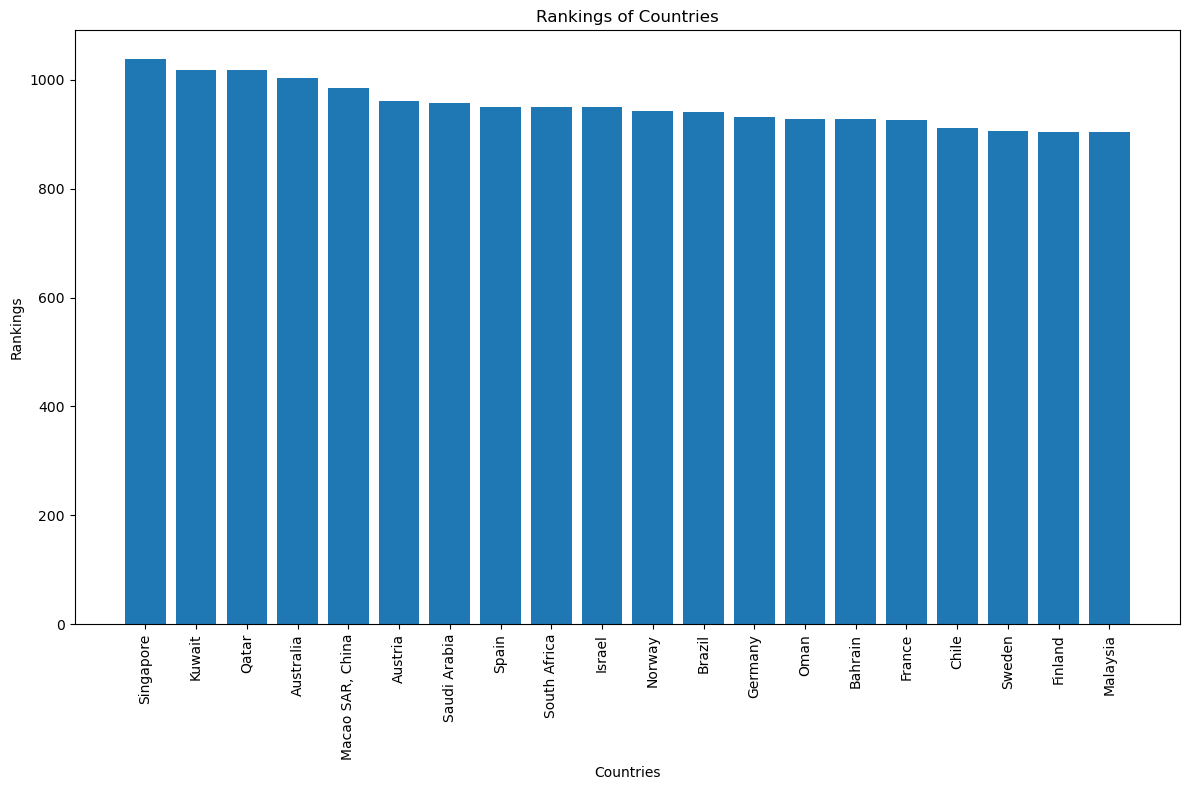

In [45]:
# affichier un tableau graphique finale par 20 premier classements 

countries = data_final1['Country Name'][:20]
rankings = data_final1['points_classement_final'][:20]

# figurer la taille de tableau

plt.figure(figsize=(12, 8))
plt.bar(countries, rankings)
plt.xlabel('Countries')
plt.ylabel('Rankings')
plt.title('Rankings of Countries')
plt.xticks(rotation=90)  # 旋转x轴标签，使其更易读
plt.tight_layout()
plt.show()

In [46]:
print(data)

       Country Name Country Code  \
91625   Afghanistan          AFG   
91626   Afghanistan          AFG   
91627   Afghanistan          AFG   
91628   Afghanistan          AFG   
91629   Afghanistan          AFG   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
91625   Adjusted net enrolment rate, lower secondary, ...   
91626   Adjusted net enrolment rate, lower secondary, ...   
91627   Adjusted net enrolment rate, lower secondary, ...   
91628   Adjusted net enrolment rate, lower secondary, ...   
91629   Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth lite